In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_sra=pd.read_csv('sra_complete_runs.csv',low_memory=False)

df_sra.head()

,Run,ReleaseDate,LoadDate,spots,bases,spots_with_mates,avgLength,size_MB,AssemblyName,download_path,...,Affection_Status,Analyte_Type,Histological_Type,Body_Site,CenterName,Submission,dbgap_study_accession,Consent,RunHash,ReadHash
0,ERR3550121,2019-09-25 19:35:40,NaN,0,0,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,UOC-CCG,ERA2143351,NaN,public,NaN,NaN
1,ERR3550142,2019-09-25 19:35:41,NaN,0,0,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,UOC-CCG,ERA2143351,NaN,public,NaN,NaN
2,ERR3550147,2019-09-25 19:35:41,NaN,0,0,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,UOC-CCG,ERA2143351,NaN,public,NaN,NaN
3,ERR3550125,2019-09-25 19:35:40,NaN,0,0,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,UOC-CCG,ERA2143351,NaN,public,NaN,NaN
4,ERR3550137,2019-09-25 19:35:40,NaN,0,0,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,UOC-CCG,ERA2143351,NaN,public,NaN,NaN


In [3]:
df_sra['ReleaseDate'] = df_sra['ReleaseDate'].apply(lambda x : pd.to_datetime(str(x)))
df_sra['year'] = df_sra['ReleaseDate'].dt.year

In [4]:
# df_sra_dates = df_sra.groupby('year').year.count()
# print(df_sra_dates)

# cumulative = [[0,0]]
# counter = 0
# for index, value in df_sra_dates.items():
#     value = int(value) + cumulative[counter][1]
#     cumulative.append([index, value])
#     counter+=1
# cumulative_with_year = cumulative[1:]
# print(cumulative_with_year)

In [5]:
df_sra_dates = df_sra.groupby('year').year.count()
# print(df_sra_dates)

cumulative = [0]
dates = []
counter = 0
for index, value in df_sra_dates.items():
    value = int(value) + cumulative[counter]
    cumulative.append(value)
    counter+=1
    dates.append(index)
cumulative = cumulative[1:]
# print(cumulative)
# print(dates)

cumulative_with_year_pandas_series = pd.Series(cumulative, index=dates)

print(cumulative_with_year_pandas_series)

2007.0        234
2008.0       6207
2009.0      24141
2010.0      78175
2011.0     151231
2012.0     304755
2013.0     519611
2014.0     975816
2015.0    1695548
2016.0    2848561
2017.0    4113518
2018.0    6143979
2019.0    7675862
dtype: int64


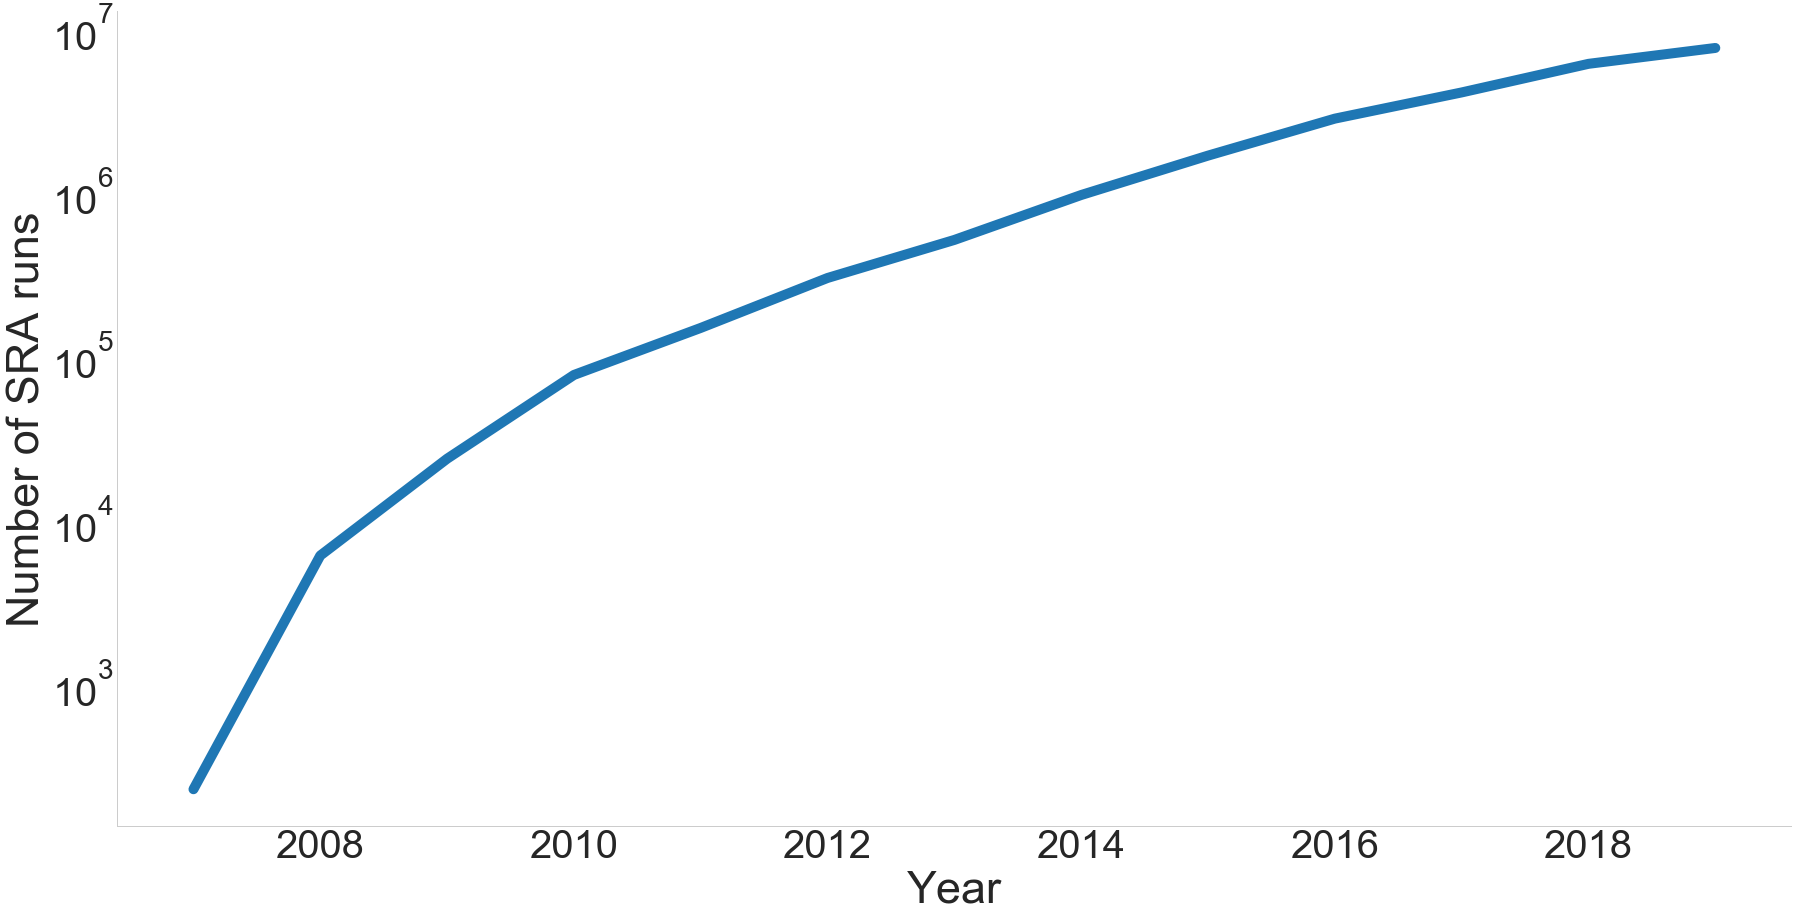

In [14]:
plt.style.use('seaborn-whitegrid')
sns.set_context(font_scale=3, rc={"lines.linewidth": 10})
plt.figure(figsize=(30,15))

ax = sns.lineplot(data = cumulative_with_year_pandas_series)
ax.set_xlabel("Year", fontsize=45)
ax.set_ylabel("Number of SRA runs", fontsize=45)
plt.yscale('log')

ax.grid(False)
sns.despine()
plt.tick_params(labelsize=40)

plt.savefig('sra_growth_by_year_cumulative.png')